# Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
https://www.kaggle.com/datasets/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**Задание 1.**
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

**Задание 2.**
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [195]:
url = 'https://raw.githubusercontent.com/NewAvalon-git/PYDA45/PYDA45-3-Statistic/water.csv'
df_base = pd.read_csv(url)
df_base = df_base.rename(columns = {'Unnamed: 0' : 'No'})

In [196]:
df_base.info()
df_base.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   No         61 non-null     int64 
 1   location   61 non-null     object
 2   town       61 non-null     object
 3   mortality  61 non-null     int64 
 4   hardness   61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


,No,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


# Задание 1. 
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

### Построить точечный график

Text(0, 0.5, 'mortality')

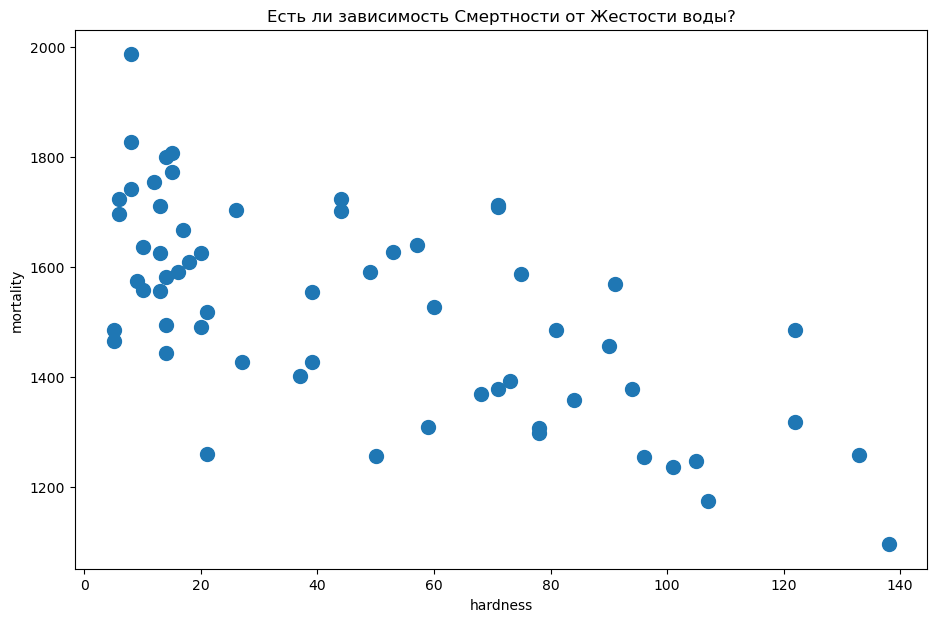

In [197]:
rcParams['figure.figsize'] = 11,7
df_base.plot.scatter(y = 'mortality', x = 'hardness', s = 100)
plt.title('Есть ли зависимость Смертности от Жестости воды?')
plt.xlabel('hardness')
plt.ylabel('mortality')



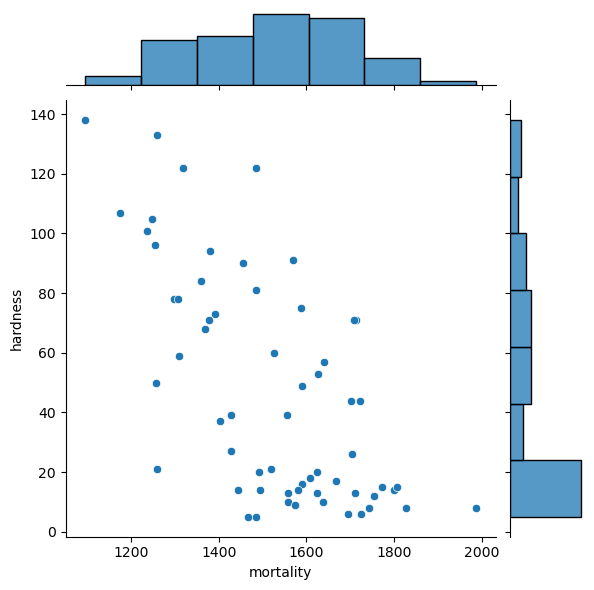

In [198]:
sns.jointplot(x = 'mortality', y = 'hardness', data = df_base)

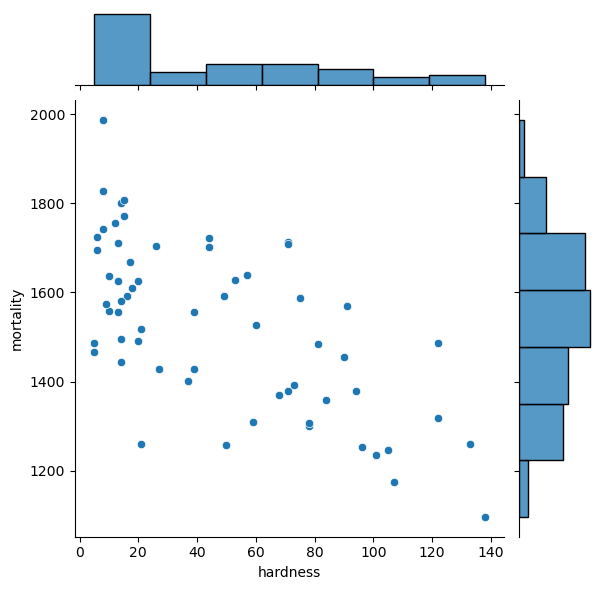

In [199]:
sns.jointplot(y = 'mortality', x = 'hardness', data = df_base)

# Вывод. Задание №1 Точечный график.
* визуально кажется что показатели зависимы. Больше жесткость - меньше смертность

### Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [200]:
# считаем коэф. корреляции Пирсона
df_base[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [201]:
# считаем коэф. корреляции Спирмана
df_base[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


#### Вывод. Корреляция.
* отрицательный коэф-т: обратная связь (рост hardness, снижение mortality)
* |r| сила связи "чуть выше" среднего. То есть есть разброс.

### Построить модель линейной регрессии

In [202]:
X = df_base[['hardness']]
y = df_base['mortality']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)

In [204]:
lm = LinearRegression()

In [205]:
lm.fit(X_train, y_train)

LinearRegression()

In [206]:
print('Коээффициенты')
lm.coef_

Коээффициенты


array([-3.09095619])

In [207]:
print('Свободный коээффициент')
lm.intercept_

Свободный коээффициент


1668.1011942166012

In [208]:
print('Предсказание Y на X_test')
y_pred = lm.predict(X_test)
y_pred

Предсказание Y на X_test


array([1448.6433046 , 1627.91876372, 1587.73633323, 1547.55390274,
       1343.55079409, 1618.64589515, 1417.73374269, 1584.64537704,
       1504.28051606, 1485.73477891, 1389.91513696, 1627.91876372,
       1241.54923976, 1627.91876372, 1606.28207038, 1643.37354468])

In [209]:
print(list(y_test))

[1709, 1711, 1704, 1555, 1247, 1591, 1485, 1427, 1627, 1309, 1456, 1557, 1096, 1625, 1491, 1828]


Text(0.5, 1.0, 'Предсказание VS Проверочная группа')

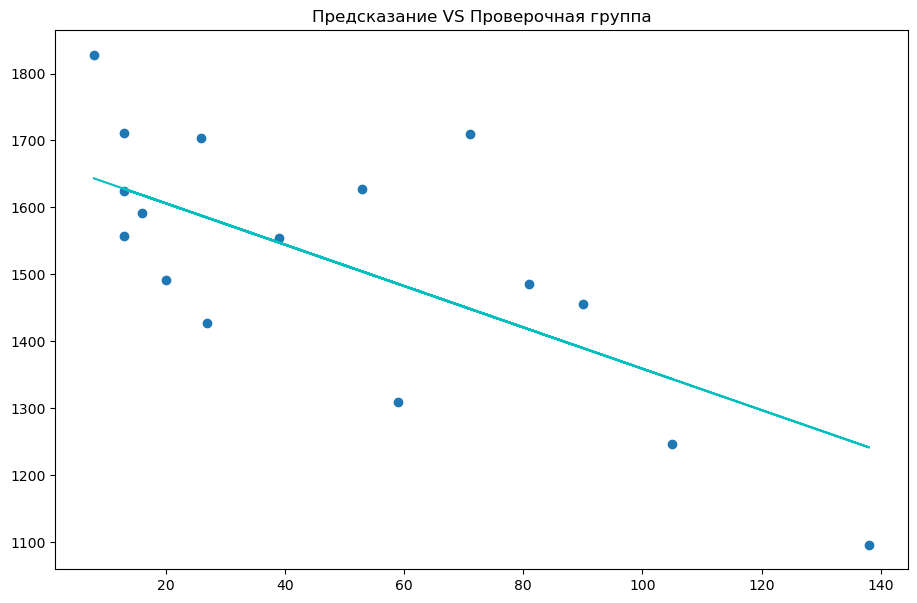

In [210]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color ='c')
plt.title('Предсказание VS Проверочная группа')

### Рассчитать коэффициент детерминации

In [211]:
print(f'R2: {metrics.r2_score(y_test, y_pred)}')

R2: 0.5368483631285758


#### Вывод. R2.
* 0<=R2<=1, ближе к 1, лучше предсказание.
* В представленном случае "50/50"

### Вывести график остатков

<Axes: xlabel='mortality', ylabel='Count'>

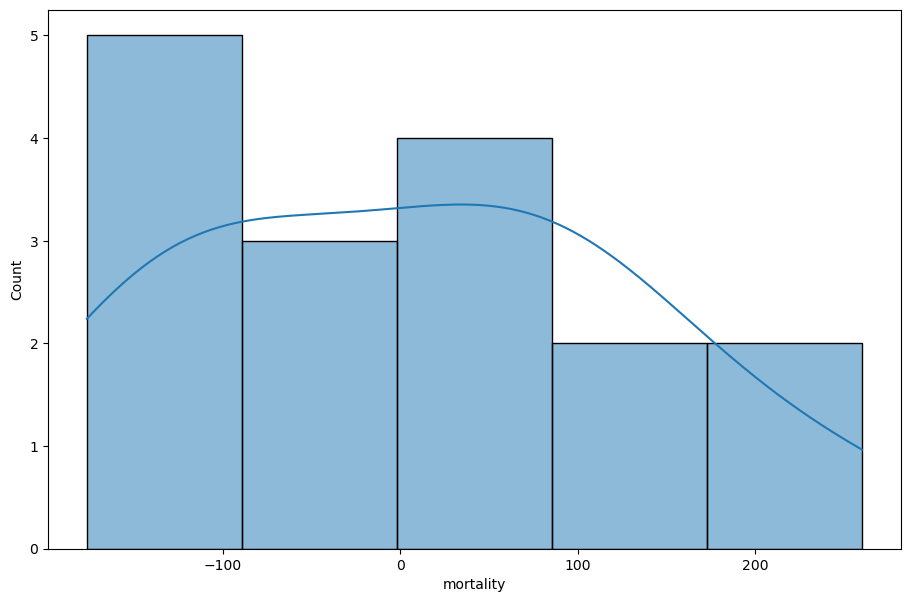

In [212]:
sns.histplot((y_test-y_pred), kde=True)

# Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

### Разделить данные на 2 группы

In [213]:
df_south = df_base[df_base['location'] == 'South']
df_north = df_base[df_base['location'] == 'North']

In [214]:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   No         26 non-null     int64 
 1   location   26 non-null     object
 2   town       26 non-null     object
 3   mortality  26 non-null     int64 
 4   hardness   26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [215]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   No         35 non-null     int64 
 1   location   35 non-null     object
 2   town       35 non-null     object
 3   mortality  35 non-null     int64 
 4   hardness   35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


### Построить точечный график

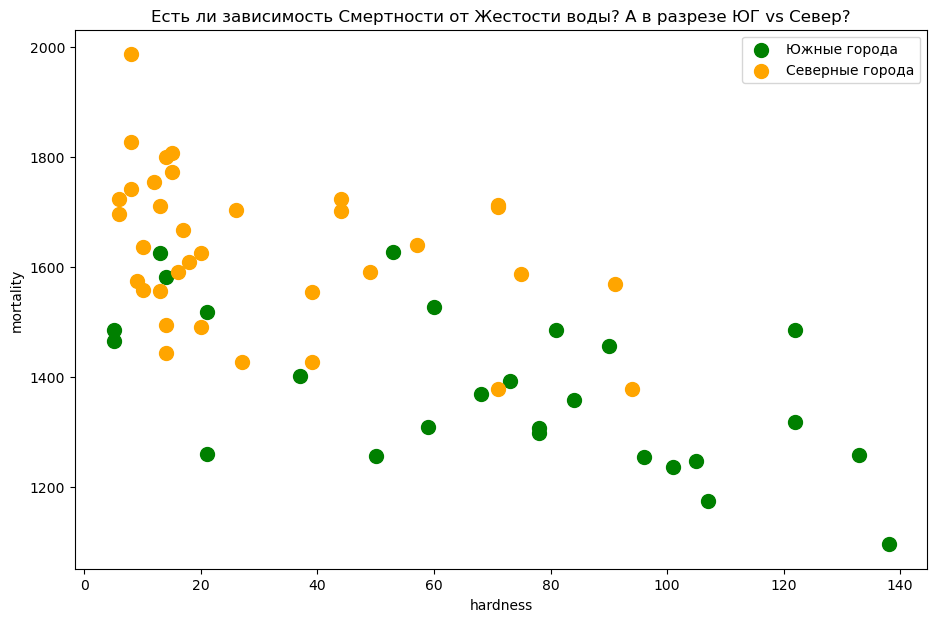

In [216]:
plt.scatter(y = df_south['mortality'], x = df_south['hardness'], s = 100, color = 'g')
plt.scatter(y = df_north['mortality'], x = df_north['hardness'], s = 100, color = 'orange')
plt.legend(labels = ['Южные города', 'Северные города'])
plt.title('Есть ли зависимость Смертности от Жестости воды? А в разрезе ЮГ vs Север?')
plt.xlabel('hardness')
plt.ylabel('mortality')

plt.show()

# Вывод. Задание №2 Точечный график по группам.
* визуально кажется что тенденция сохраняется и при делении по группам показатели зависимы. Больше жесткость - меньше смертность

**Однако, смертность в Северных в целом выше, чем в Южных** 

Особенно это заметно в левой части графика (при низком hardness, вообще плотность смертности выше)

**Для справки**
https://cgon.rospotrebnadzor.ru/naseleniyu/gramotnyy-potrebitel/myagkaya-i-zhyestkaya-voda/
<br>
*"Однако, достоверных клинических исследований о вреде такой воды на организм человека не существует. Поэтому, вероятнее всего, потребление и использование в быту жёсткой или мягкой воды не является опасным для здоровья."*

### Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [217]:
# считаем коэф. корреляции Пирсона
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [218]:
# считаем коэф. корреляции Пирсона
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [219]:
# считаем коэф. корреляции Спирмена
df_south[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [220]:
# считаем коэф. корреляции Спирмена
df_north[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


#### Вывод. Корреляция.
* Отрицательная обратная связь сохранилась в обоих случаях (рост одного -> падение другого)
* Для Северных корреляция стала меньше 0,5.

In [221]:
disp_south = df_south['mortality'].var() 
disp_north = df_north['mortality'].var()
print('D_South: {0}, D_North: {1}'.format(round(disp_south), round(disp_north)))

D_South: 19675, D_North: 18752


### Построить модель линейной регрессии

In [222]:
X_south = df_south[['hardness']]
y_south = df_south['mortality']

X_north = df_north[['hardness']]
y_north = df_north['mortality']

In [223]:
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, random_state=111)
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, random_state=111)

In [224]:
lm_south = LinearRegression()
lm_north = LinearRegression()

In [225]:
lm_south.fit(X_south_train, y_south_train)
print('Юг')
print('Коэффициенты:', lm_south.coef_, 
      'Свободный коэффициент:', lm_south.intercept_)

Юг
Коэффициенты: [-2.01424057] Свободный коэффициент: 1531.457948930583


In [226]:
lm_north.fit(X_north_train, y_north_train)
print('Север')
print('Коэффициенты:', lm_north.coef_, 
      'Свободный коэффициент:', lm_north.intercept_)

Север
Коэффициенты: [-1.50240478] Свободный коэффициент: 1652.0507854505638


...как по разному обучились...посмотрим дальше

In [227]:
print('Юг. Предсказание Y на X_test')
y_south_pred = lm_south.predict(X_south_test)
y_south_pred.round(0)

Юг. Предсказание Y на X_test


array([1457., 1264., 1362., 1316., 1384., 1413., 1374.])

In [228]:
print(list(y_south_test))

[1402, 1259, 1359, 1175, 1392, 1309, 1307]


In [229]:
print('Север. Предсказание Y на X_test')
y_north_pred = lm_north.predict(X_north_test)
y_north_pred.round(0)

Север. Предсказание Y на X_test


array([1640., 1627., 1511., 1545., 1633., 1630., 1545., 1637., 1640.])

In [230]:
print(list(y_north_test))

[1987, 1668, 1379, 1709, 1711, 1807, 1713, 1558, 1828]


Text(0.5, 1.0, 'Предсказание VS Проверочная группа')

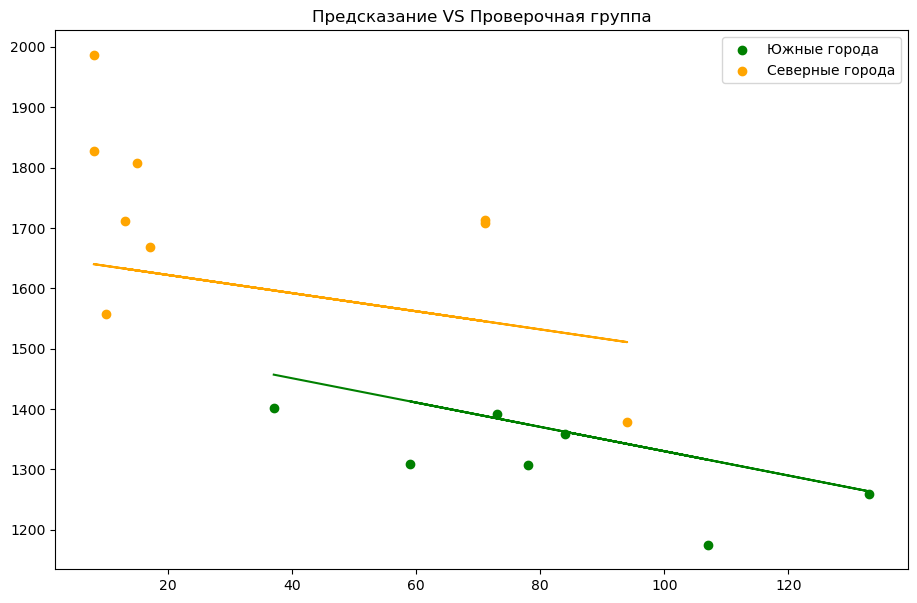

In [231]:
plt.scatter(X_south_test, y_south_test, color ='g')
plt.scatter(X_north_test, y_north_test, color ='orange')
plt.plot(X_south_test, y_south_pred, color ='g')
plt.plot(X_north_test, y_north_pred, color ='orange')
plt.legend(labels = ['Южные города', 'Северные города'])
plt.title('Предсказание VS Проверочная группа')

### Рассчитать коэффициент детерминации

In [232]:
print(f'R2: {metrics.r2_score(y_south_test, y_south_pred)}')
print(f'R2: {metrics.r2_score(y_north_test, y_north_pred)}')

R2: 0.0007401651612380933
R2: -0.1671906013772957


#### Вывод. R2.
* R2 при визуально удовлетворительном качестве показывает, что модель плохо обучилась
* R2 катастрофически упал, относительно обучения на полном наборе данных
* И даже принял отрицательное значение: 
*коэффициент детерминации принимает отрицательные значения (обычно небольшие). Это случается, когда ошибка модели простого среднего становится меньше ошибки регрессионной модели*

### Вывести график остатков

<Axes: xlabel='mortality', ylabel='Count'>

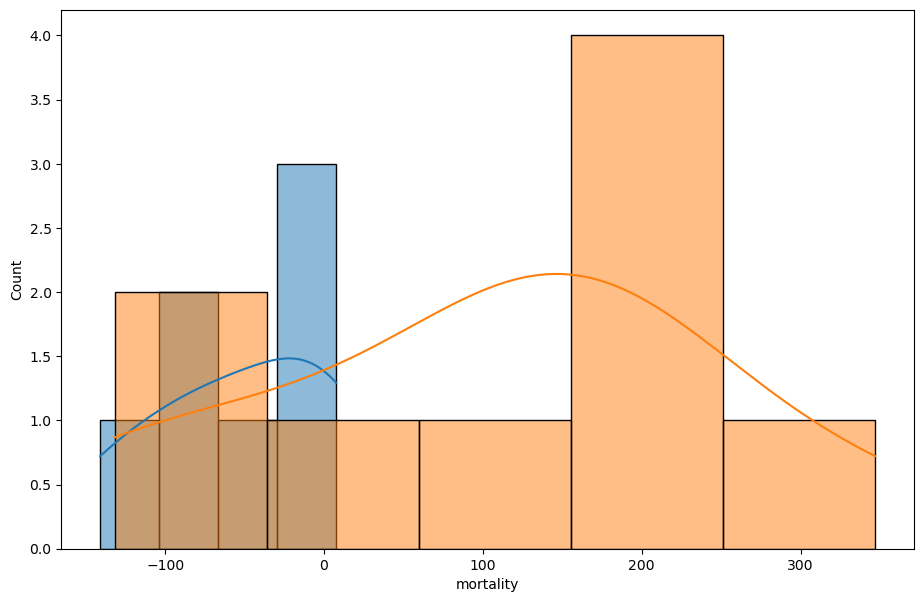

In [233]:
# с наложением тоже неплохо получилось
# далее построены также по-отдельности
sns.histplot((y_south_test - y_south_pred), kde=True)
sns.histplot((y_north_test - y_north_pred), kde=True)

<Axes: xlabel='mortality', ylabel='Count'>

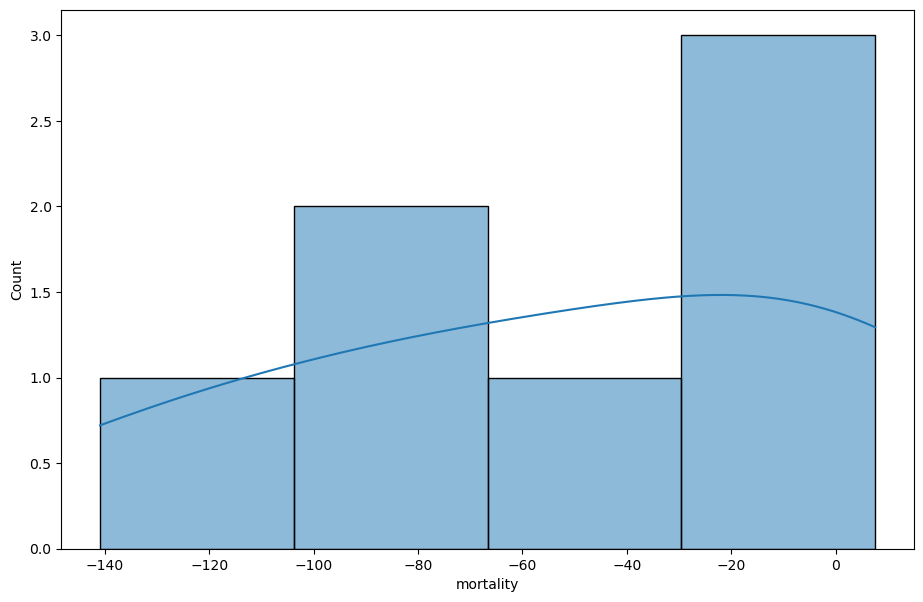

In [234]:
sns.histplot((y_south_test - y_south_pred), kde=True)

<Axes: xlabel='mortality', ylabel='Count'>

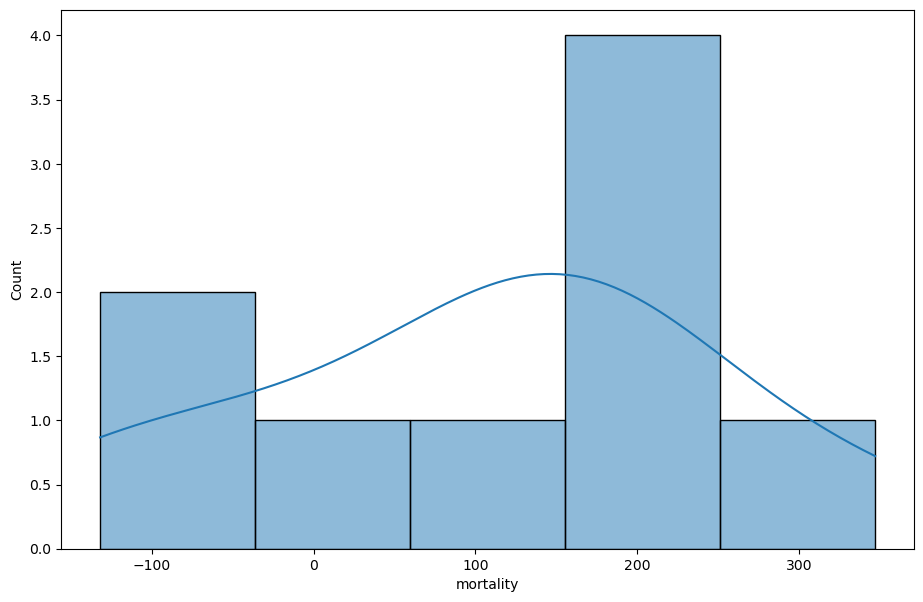

In [235]:
sns.histplot((y_north_test - y_north_pred), kde=True)